# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic_signs_data/train.p'
validation_file= 'traffic_signs_data/valid.p'
testing_file = 'traffic_signs_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

n_valid = np.shape(X_valid)[0]
# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Read Ground Truth Labels

__Key idea:__

Read Traffic signs labels from csv.

In [3]:
import csv

with open('signnames.csv') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    signname = []
    for row_id,row in enumerate(csv_reader):
        if row_id == 0:
            pass
        else:
            signname.append(row[1])


## Read Ground Truth Images

__Key idea:__

Read Traffic signs Ground Truth Images associated with its label.

In [4]:
import os
signs_dir = 'signs/'
signs_images=os.listdir(signs_dir)
ground_truth_signs = []
ground_truth_labels = []
for img_name in signs_images:
    img = cv2.imread(signs_dir+img_name)
    ground_truth_signs.append(img[:,:,::-1])
    ground_truth_labels.append(int(img_name.split('.')[0]))
ground_truth_labels = np.array(ground_truth_labels)

# Visualization of Dataset

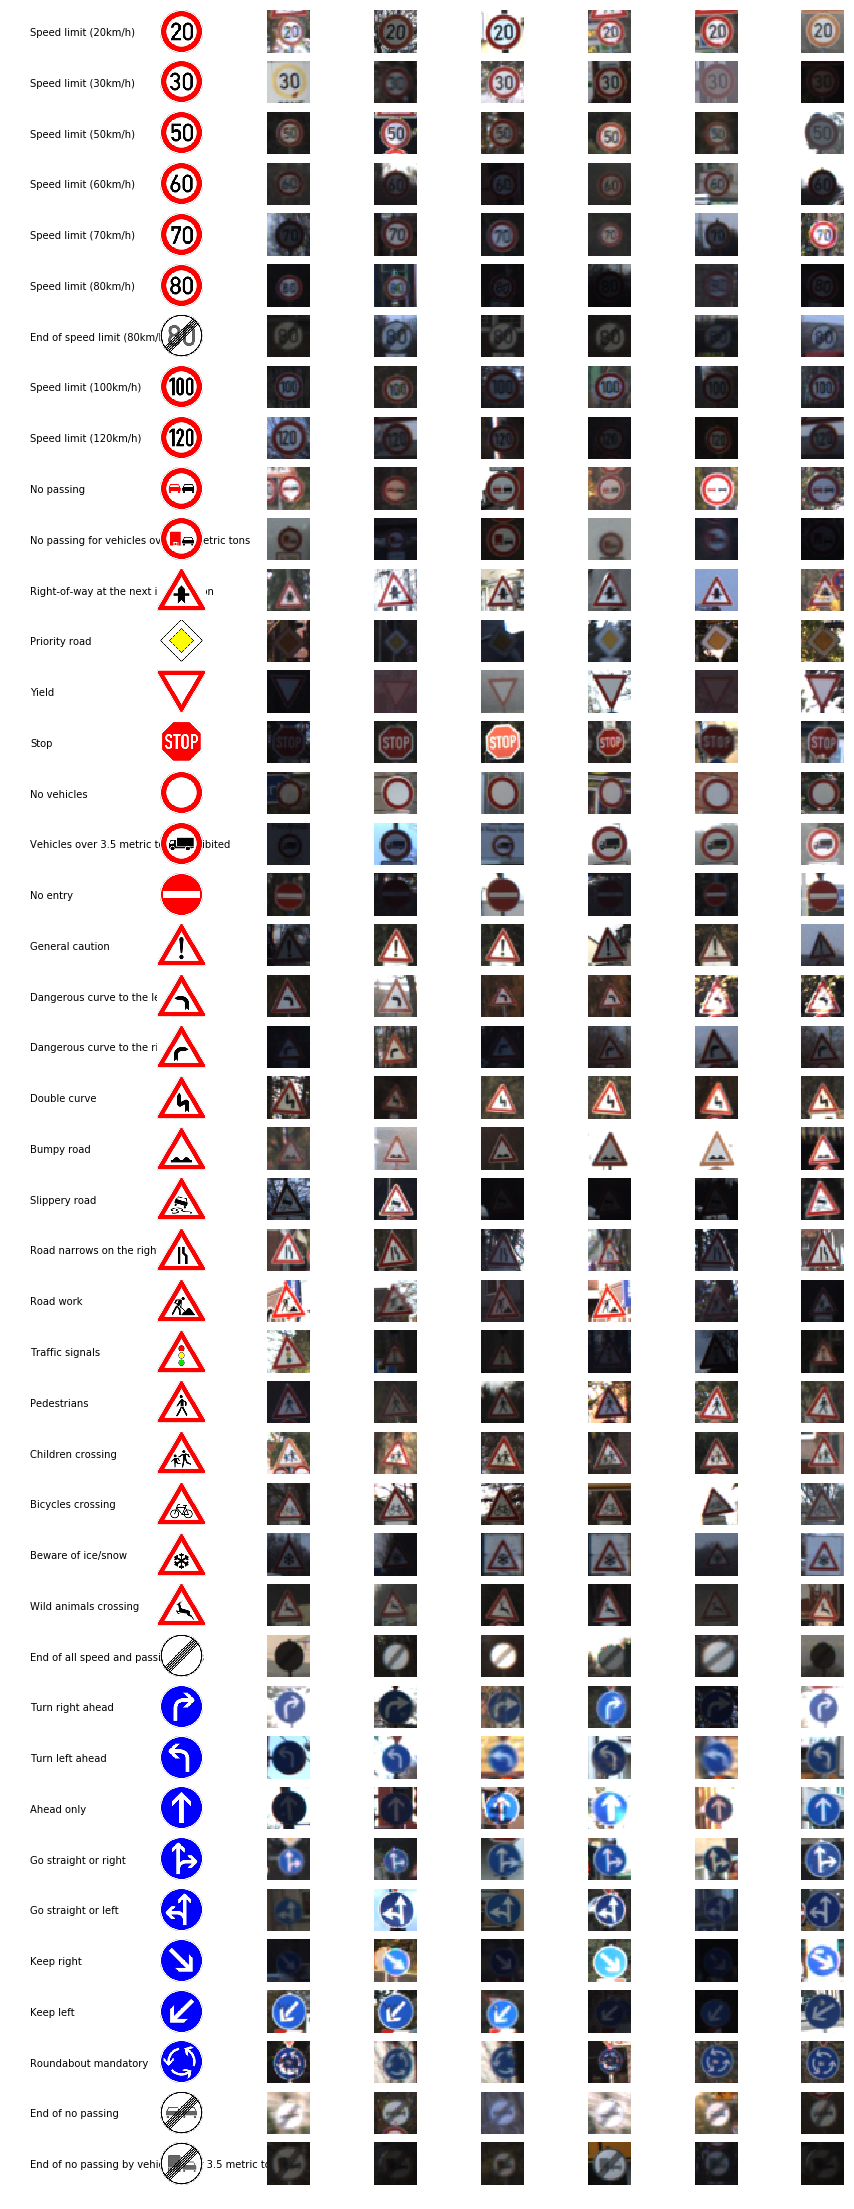

In [5]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(n_classes, 8)

data_index = [np.where(np.array(y_train)==classid)[0] for classid in range(n_classes)]
# plot samples for each traffic signs 
data_set_fig = plt.figure(num=1,figsize=(15, 40))
# st = data_set_fig.suptitle("Training  DataSet Samples", fontsize="x-large")
ax = []
for class_id in range(n_classes):
    # plot ground truth label
    ax.append(data_set_fig.add_subplot(gs[class_id, 0]))
    ax[-1].text(0, 0.6, signname[class_id], ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    
    # plot ground truth image
    ax.append(data_set_fig.add_subplot(gs[class_id, 1]))
    gt_image_id = np.where(np.array(ground_truth_labels)==class_id)[0][0]
    ax[-1].imshow(ground_truth_signs[gt_image_id])
    ax[-1].set_axis_off()
    # plot random samples for each class
    index = np.random.choice(data_index[class_id], 6,replace=False)
    for sample in range(6):
        image = X_train[index[sample]].squeeze()
        ax.append(data_set_fig.add_subplot(gs[class_id, sample+2]))
        ax[-1].imshow(image)
        ax[-1].set_axis_off()


## Histogram of Training Dataset

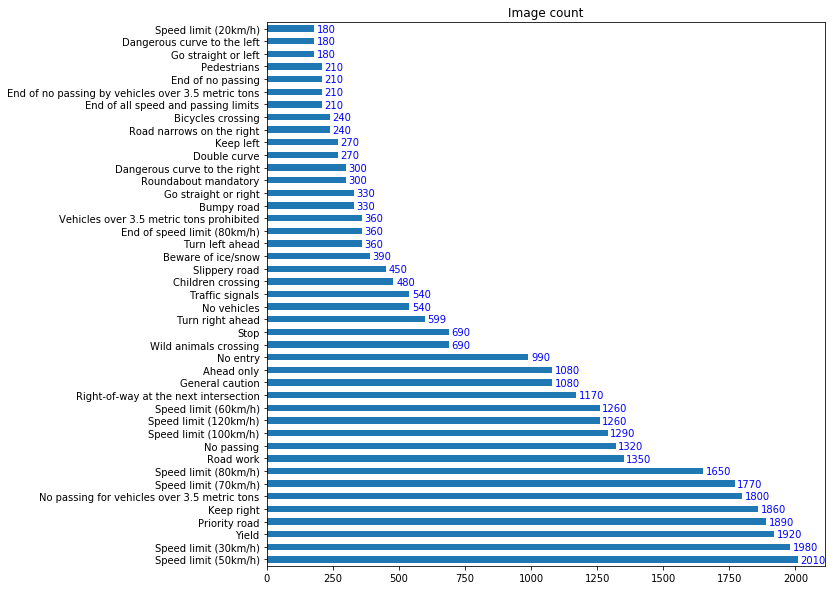

In [6]:
import pandas as pd

def plot_histogram(y_train):
    classes = pd.DataFrame()
    classes['label'] = y_train
    ax = classes['label'].value_counts().plot(kind='barh', figsize = (10,10), title='Image count')
    ax.set_yticklabels(list(map(lambda x: signname[x], classes['label'].value_counts().index.tolist()))) 

    for i, v in enumerate(classes['label'].value_counts()):
        ax.text(v + 10, i - 0.25, str(v), color='blue')
plot_histogram(y_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
import tensorflow as tf
from spatial_transformer import transformer  # ref:https://github.com/daviddao/spatial-transformer-tensorflow
from tf_utils import weight_variable, bias_variable, dense_to_one_hot
from tensorflow.contrib.layers import flatten


In [24]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Shuffling training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Calculate Mean image to be used for normlization of Network input

mean_image = np.mean(X_train,axis=0)




### Model Architecture

# Localization Network
## Create placeholders

__Key idea:__

Placeholders for 32x32 resolution input images.


In [25]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
mean_image_placeholder = tf.placeholder(tf.float32, (32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)
keep_prob_fc = tf.placeholder(tf.float32)
keep_prob_conv = tf.placeholder(tf.float32)

## Setup a two-layer Localization network

__Key idea:__

Setup the two-layer localisation network to figure out the parameters for an affine transformation of the input.  Use identity transformation as starting point.

In [26]:
# Identity transformation
initial = np.array([[1., 0, 0], [0, 1., 0]])
initial = initial.astype('float32')
initial = initial.flatten()

# Create variables for fully connected layer for the localisation network
W_fc_loc1 = weight_variable([600, 100])
b_fc_loc1 = bias_variable([100])

W_fc_loc2 = weight_variable([100, 6])
b_fc_loc2 = tf.Variable(initial_value=initial, name='b_fc_loc2')


## Define a two layer Localization network

__Key idea:__

Use Basic LeNet Arch.and  add regularization technique (dropout) in anticipation for overfitting.

In [27]:
def localization_net(x):
    mu = 0
    sigma = 0.1
    loc_conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    loc_conv1_b = tf.Variable(tf.zeros(6))
    # Layer 1: Convolutional. Output = 28x28x6.
    loc_conv1   = tf.nn.conv2d(x, loc_conv1_W, strides=[1, 1, 1, 1], padding='VALID') + loc_conv1_b

    # layer1: Activation.
    loc_conv1 = tf.nn.relu(loc_conv1)

    # layer1: Pooling. Input = 28x28x6. Output = 14x14x6.
    loc_conv1 = tf.nn.max_pool(loc_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    loc_conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 24), mean = mu, stddev = sigma))
    loc_conv2_b = tf.Variable(tf.zeros(24))
    loc_conv2   = tf.nn.conv2d(loc_conv1, loc_conv2_W, strides=[1, 1, 1, 1], padding='VALID') + loc_conv2_b
    
    # Layer 2: Activation.
    loc_conv2 = tf.nn.relu(loc_conv2)

    # Layer 2: Pooling. Input = 10x10x24. Output = 5x5x24.
    loc_conv2 = tf.nn.max_pool(loc_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Flatten. Input = 5x5x24. Output = 400.
    fc0   = flatten(loc_conv2)
    # Layer 4: Fully connected layers
    h_fc_loc1 = tf.nn.tanh(tf.matmul(fc0, W_fc_loc1) + b_fc_loc1)

    # Layer 5: Dropout for regularization
    h_fc_loc1_drop = tf.nn.dropout(h_fc_loc1, keep_prob)

    # Layer 6: Fully connected layers
    h_fc_loc2 = tf.nn.tanh(tf.matmul(h_fc_loc1_drop, W_fc_loc2) + b_fc_loc2)
    return h_fc_loc2

In [28]:
def inception_block(input,features_num):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional 1x1 
    conv1x1_w = tf.Variable(tf.truncated_normal(shape=(1, 1, features_num, 24), mean = mu, stddev = sigma))
    conv1x1_b = tf.Variable(tf.zeros(24))
    conv1x1   = tf.nn.conv2d(input, conv1x1_w, strides=[1, 3, 3, 1], padding='SAME') + conv1x1_b
    conv1x1 = tf.nn.relu(conv1x1)
    
    # Layer 2: Convolutional 3x3 
    conv3x3_w = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 16), mean = mu, stddev = sigma))
    conv3x3_b = tf.Variable(tf.zeros(16))
    conv3x3   = tf.nn.conv2d(conv1x1, conv3x3_w, strides=[1, 1, 1, 1], padding='SAME') + conv3x3_b
    conv3x3 = tf.nn.relu(conv3x3)
    
    # Layer 3: Convolutional 5x5 
    conv5x5_w = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 8), mean = mu, stddev = sigma))
    conv5x5_b = tf.Variable(tf.zeros(8))
    conv5x5   = tf.nn.conv2d(conv1x1, conv5x5_w, strides=[1, 1, 1, 1], padding='SAME') + conv5x5_b
    conv5x5 = tf.nn.relu(conv5x5)
    
    # Layer 4: max pooling 3x3
    max3x3   = tf.nn.max_pool(conv3x3, ksize=[1, 3, 3, 1], strides=[1, 1, 1, 1], padding='SAME')
    # Concatenates feature maps
    output = tf.concat([conv1x1, conv3x3,conv5x5,max3x3],3)
    return output 
    
    

In [29]:
def unified_inception_model(x):
    mu = 0
    sigma = 0.1
    
    # normlization layer
    # batch_input = x - mean_image_placeholder
    """
    Input Normalization was tried but tends to give less accuracy than using input data as it
    """
    batch_input = x
    
    ## Create a spatial transformer module
    affain_transformation = localization_net(batch_input)
    x_trans = transformer(batch_input, affain_transformation, (32, 32))
    
    # inception Block #1
    
    inception_1 = inception_block(x_trans,3)
    
    # Dropout layer
    
    inceptoon_dropout = tf.nn.dropout(inception_1, keep_prob_conv)
    
    # inception Block #2
    
    inception_2 = inception_block(inception_1,64)
    
    # Flatten layer
    
    flatten_features   = flatten(inception_2)
    
    # Fully connected layer 1.. Input = 1000. Output = 1000. 
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(flatten_features, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)
    
    # Fully connected layer 2. Input = 512. Output = 1000.
    
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)
    
    # Dropout for regularization
    
    fc2_droped = tf.nn.dropout(fc2, keep_prob_fc)
    
    # Fully connected layer3. Input = 100. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2_droped, fc3_W) + fc3_b
    
    return inception_1, inception_2, logits , x_trans

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

EPOCHS = 50
BATCH_SIZE = 128
rate = 0.0001
# Training pipeline 

inception_1, inception_2, logits , x_trans = unified_inception_model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
network_output = tf.nn.softmax(logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [31]:
# Validation pipeline
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,mean_image_placeholder:mean_image, keep_prob: 1.0, keep_prob_fc: 1.0, keep_prob_conv: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [32]:
#training phase
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    training_accuracy = []
    validation_accuracy = []
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, mean_image_placeholder:mean_image, keep_prob: 0.4, keep_prob_fc: 0.5, keep_prob_conv: 0.5})
        
        training_accuracy.append(evaluate(X_train, y_train))
        validation_accuracy.append(evaluate(X_valid, y_valid))
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy[-1]))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy[-1]))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.166
Validation Accuracy = 0.137

EPOCH 2 ...
Training Accuracy = 0.299
Validation Accuracy = 0.262

EPOCH 3 ...
Training Accuracy = 0.432
Validation Accuracy = 0.384

EPOCH 4 ...
Training Accuracy = 0.551
Validation Accuracy = 0.488

EPOCH 5 ...
Training Accuracy = 0.601
Validation Accuracy = 0.532

EPOCH 6 ...
Training Accuracy = 0.647
Validation Accuracy = 0.569

EPOCH 7 ...
Training Accuracy = 0.710
Validation Accuracy = 0.630

EPOCH 8 ...
Training Accuracy = 0.737
Validation Accuracy = 0.666

EPOCH 9 ...
Training Accuracy = 0.769
Validation Accuracy = 0.699

EPOCH 10 ...
Training Accuracy = 0.802
Validation Accuracy = 0.727

EPOCH 11 ...
Training Accuracy = 0.830
Validation Accuracy = 0.763

EPOCH 12 ...
Training Accuracy = 0.859
Validation Accuracy = 0.788

EPOCH 13 ...
Training Accuracy = 0.873
Validation Accuracy = 0.806

EPOCH 14 ...
Training Accuracy = 0.891
Validation Accuracy = 0.815

EPOCH 15 ...
Training Accuracy = 0.918
Valid

## Training and Validation Accuracy 

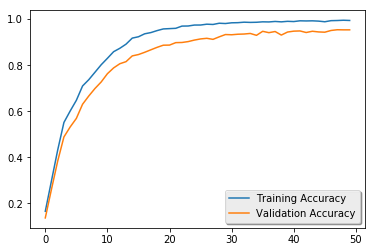

In [33]:
fig, ax = plt.subplots()
ax.plot(training_accuracy, label='Training Accuracy')
ax.plot(validation_accuracy, label='Validation Accuracy')
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

## Confusion Matrix for Training Data

Model restored.
Confusion matrix, without normalization
[[ 28   0   0 ...,   0   0   0]
 [  0 230   4 ...,   0   0   0]
 [  0  10 225 ...,   0   0   0]
 ..., 
 [  0  12   0 ...,  42   0   0]
 [  0   0   0 ...,   0  30   0]
 [  0   0   0 ...,   0   0  30]]


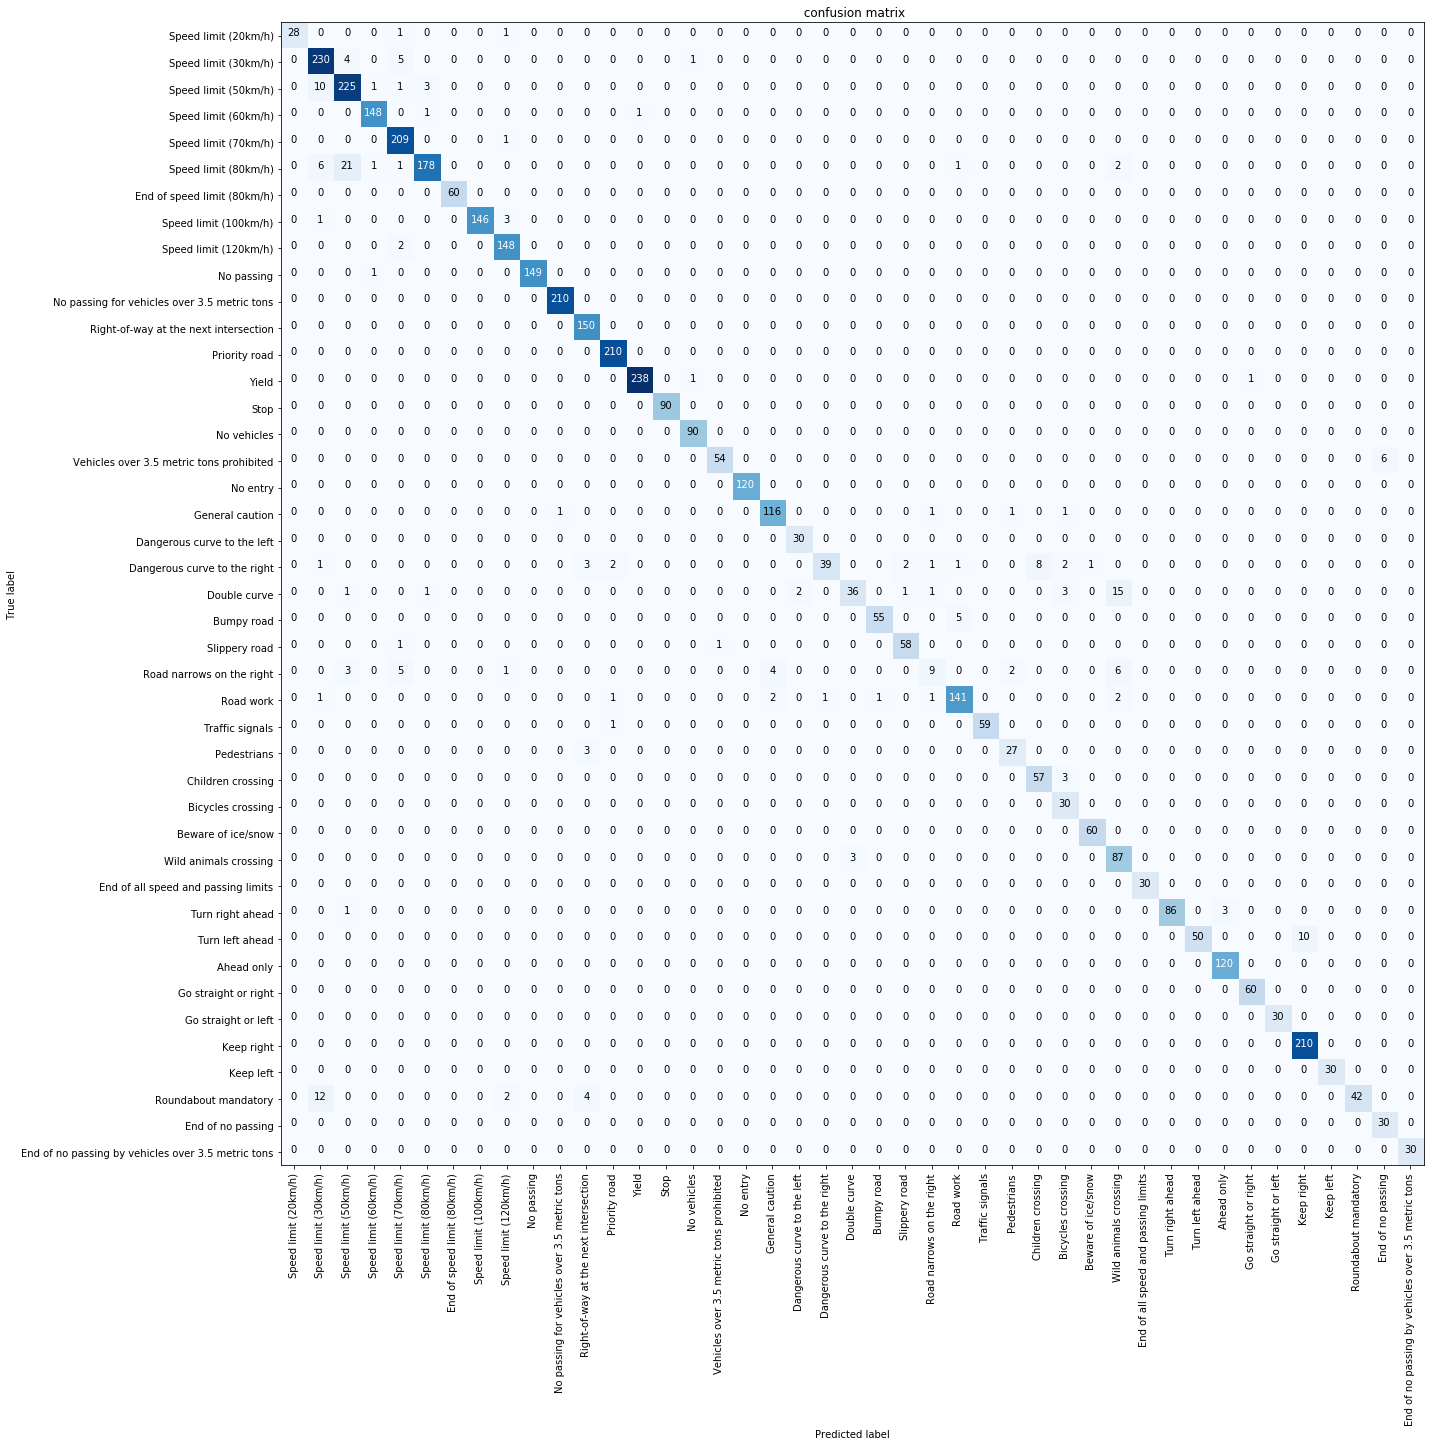

In [35]:
import itertools
from sklearn.metrics import confusion_matrix

"""
Ref : http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#     plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    print("Model restored.")
    logits = sess.run(network_output, feed_dict={x: X_valid, y: y_valid, mean_image_placeholder:mean_image, keep_prob: 1.0, keep_prob_fc: 1.0, keep_prob_conv: 1.0})
    y_pred = np.argmax(logits,axis=1)
cnf_matrix = confusion_matrix(y_valid, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=signname, title=' confusion matrix')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

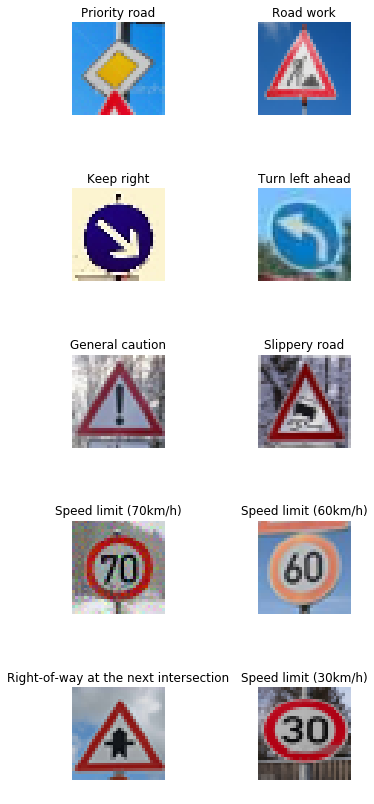

In [36]:
### Load the images and plot them here.
import os
test_images_dir = "test_images/"
test_images=os.listdir(test_images_dir)
images = []
labels = []
f, axarr = plt.subplots(5, 2)
for id,img_name in enumerate(test_images):
    img = cv2.imread(test_images_dir+img_name)
    images.append(img[:,:,::-1])
    labels.append(int(img_name.split('.')[0]))
    axarr[id%5, id // 5].imshow(images[-1])
    axarr[id%5, id // 5].set_title(signname[labels[-1]])
    axarr[id%5, id // 5].set_axis_off()
f.set_size_inches(5,15)
f.subplots_adjust(wspace=1, hspace=0.1)


### Predict the Sign Type for Each Image

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
def forward_inference(X_data, y_data):
    sess = tf.get_default_session()
    accuracy, transformed_image = sess.run([network_output,x_trans], feed_dict={x: X_data, y: y_data, mean_image_placeholder:mean_image, keep_prob: 1.0, keep_prob_fc: 1.0, keep_prob_conv: 1.0})
    return accuracy, transformed_image


with tf.Session() as sess:
    # Restore variables from disk.
    output_probabilites = []
    transformed_images = []
    predicted_labels = []
    saver.restore(sess, "./lenet")
    print("Model restored.")
    for i in range(len(images)):
        images_TF = tf.expand_dims(images[i], 0)
        img_prob,img_transformed = forward_inference(images_TF.eval(),tf.expand_dims(np.array(labels[i]), 0).eval())
        output_probabilites.append(img_prob)
        transformed_images.append(img_transformed)
        predicted_labels.append((np.argmax(output_probabilites[i][0]),np.max(output_probabilites[i][0])))
        print("model predicted \"{}\" with accuracy {:.5f} but True label is \" {}\" with accuracy {:.5f} ".format(signname[np.argmax(output_probabilites[i][0])],
                                                             np.max(output_probabilites[i][0]),signname[labels[i]],output_probabilites[i][0][labels[i]]))
        
    TopKV5 = sess.run(tf.nn.top_k(tf.constant(np.array(output_probabilites)), k=5))
    print(TopKV5)
    

Model restored.
model predicted "Priority road" with accuracy 1.00000 but True label is " Priority road" with accuracy 1.00000 
model predicted "Keep right" with accuracy 1.00000 but True label is " Keep right" with accuracy 1.00000 
model predicted "General caution" with accuracy 1.00000 but True label is " General caution" with accuracy 1.00000 
model predicted "Speed limit (20km/h)" with accuracy 0.84296 but True label is " Speed limit (70km/h)" with accuracy 0.05448 
model predicted "Right-of-way at the next intersection" with accuracy 1.00000 but True label is " Right-of-way at the next intersection" with accuracy 1.00000 
model predicted "Road work" with accuracy 0.99148 but True label is " Road work" with accuracy 0.99148 
model predicted "Turn left ahead" with accuracy 1.00000 but True label is " Turn left ahead" with accuracy 1.00000 
model predicted "Slippery road" with accuracy 0.99694 but True label is " Slippery road" with accuracy 0.99694 
model predicted "Speed limit (50

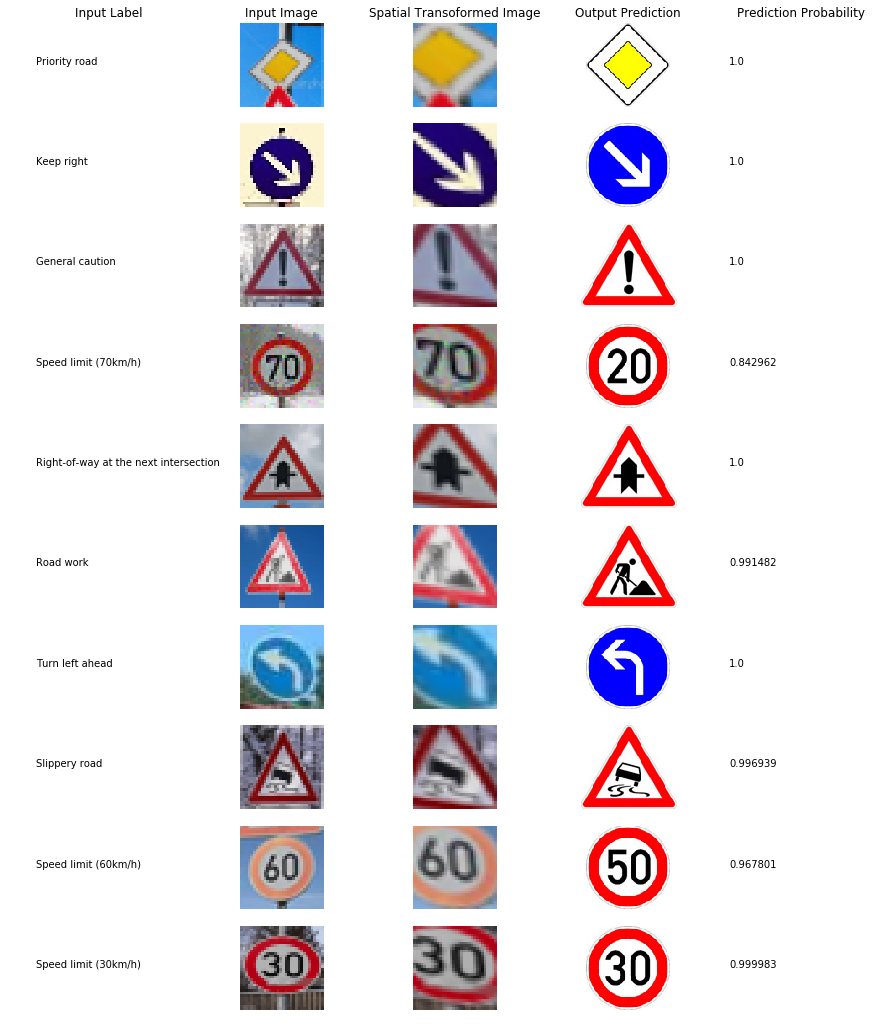

In [73]:
test_gs = gridspec.GridSpec(len(images)+1, 5)

# plot samples for each traffic signs 
data_set_fig = plt.figure(figsize=(15, 20))
# st = data_set_fig.suptitle("Training  DataSet Samples", fontsize="x-large")
ax = []
for img_id in range(len(images)):
    # plot Input Image and label
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 0]))
    ax[-1].text(0, 0.6, signname[labels[img_id]], ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Input Label')
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 1]))
    ax[-1].imshow(images[img_id])
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Input Image')
    # plot Transformation of output
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 2]))
    ax[-1].imshow(np.array(transformed_images[img_id][0],dtype=np.uint8))
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Spatial Transoformed Image')
    #plot predected sign image and accuarcy 
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 3]))
    gt_image_id = np.where(np.array(ground_truth_labels)==predicted_labels[img_id][0])[0][0]
    ax[-1].imshow(ground_truth_signs[gt_image_id])
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Output Prediction')
    ax.append(data_set_fig.add_subplot(test_gs[img_id, 4]))
    ax[-1].text(0, 0.6, str(predicted_labels[img_id][1]), ha='left', va='top', wrap=True)
    ax[-1].set_axis_off()
    if img_id == 0:
        plt.title('Prediction Probability')
    

### Analyze Performance

In [69]:
### Given new small test dataset, Model Accuracy is calculated below
overall_accuracy = 0
for sample_id, sample_result in enumerate(output_probabilites):   
    if np.argmax(sample_result[0]) == labels[sample_id]:
        overall_accuracy += 1
overall_accuracy = overall_accuracy / float(len(output_probabilites))
print("Model Accuracy over small test set = {:.2f} %".format(overall_accuracy*100))

Model Accuracy over small test set = 80.00 %


# Test Dataset Accuracy

In [70]:
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./lenet")
    print(evaluate(X_test,y_test))

0.932620744401


---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [54]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation,figure_title="Layer_Visualization", activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob:1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(20,20))
    plt.suptitle(figure_title, fontsize=18)
    for featuremap in range(featuremaps):
        plt.subplot(10,10, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Model restored.


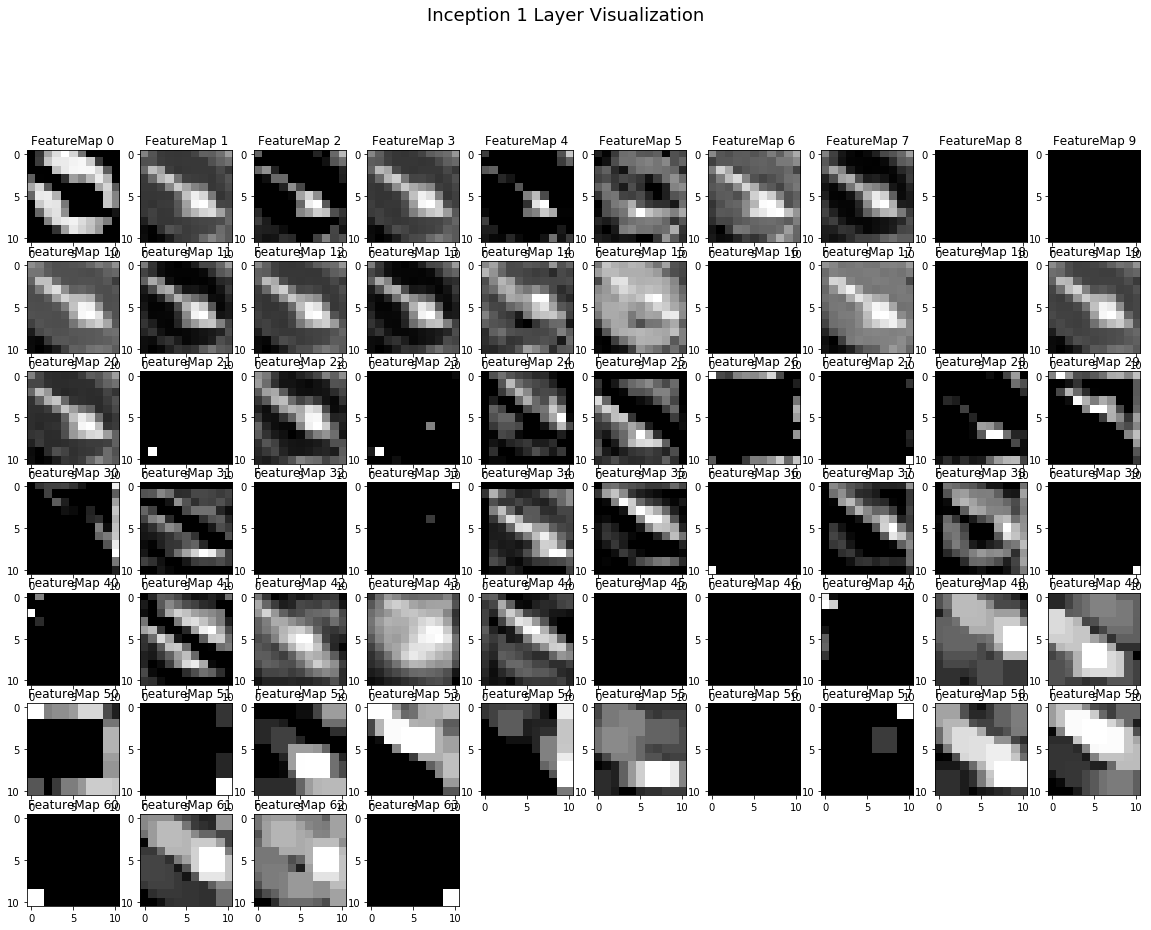

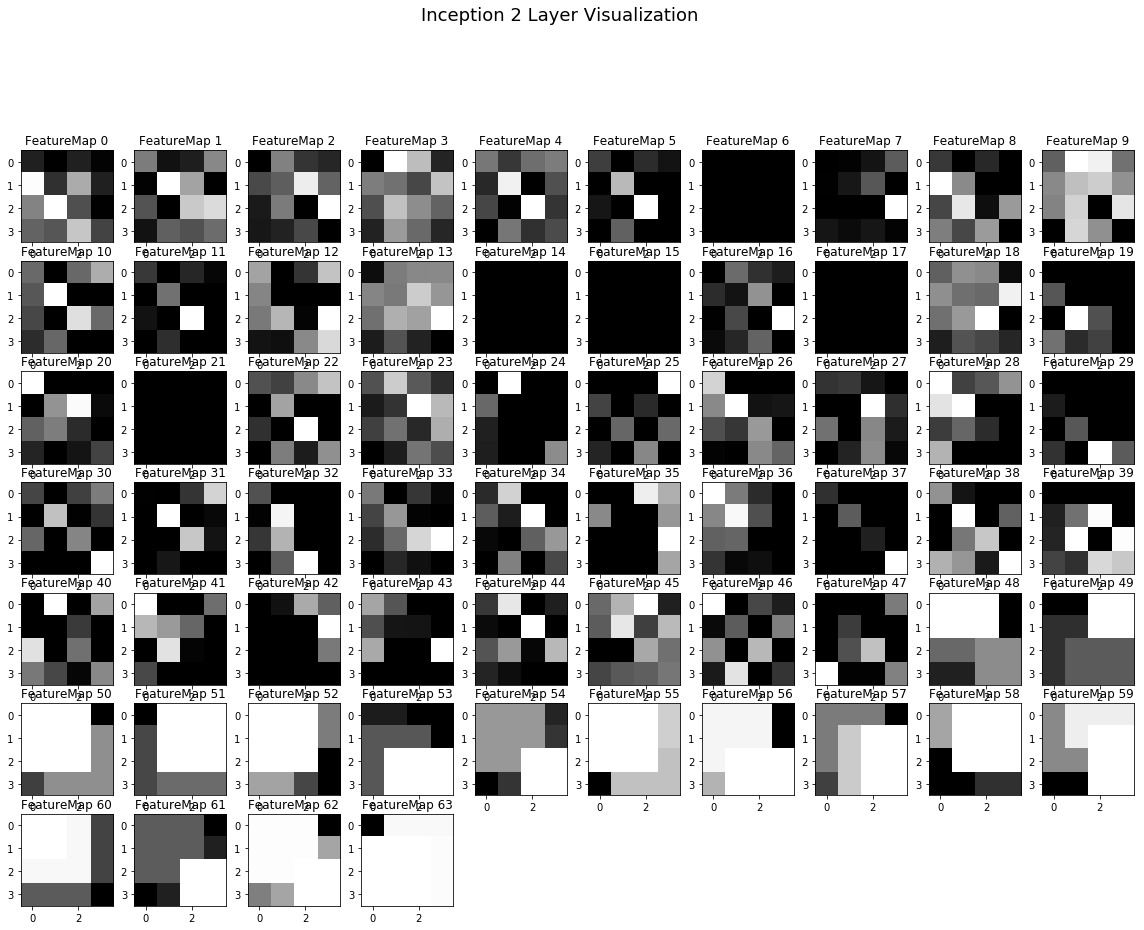

In [76]:
import random

with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    print("Model restored.")
    index = random.randint(0, len(X_test))
    image = X_test[index].squeeze()
    images_TF = tf.expand_dims(np.array(image), 0)
    outputFeatureMap(images_TF.eval(), inception_1,figure_title="Inception 1 Layer Visualization", plt_num=1)
    outputFeatureMap(images_TF.eval(), inception_2,figure_title="Inception 2 Layer Visualization", plt_num=2)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** Visualization of Inner layers outputs helps detection of overfitting and analysis of learned features in every layer